In [1]:
!pip install --upgrade pygments
!pip install tensorflow-addons
!pip install split-folders
!pip install matplotlib pandas seaborn keras tensorflow scikit-learn scipy


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacem

In [2]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib_inline
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from keras.applications import DenseNet121
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow_addons as tfa
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization
from keras.applications import ResNet50
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from PIL import Image

import splitfolders


2024-01-28 18:33:30.902976: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-28 18:33:30.967968: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-28 18:33:30.969310: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-28 18:33:32.224712: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/sumon/.local/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modi

# EDA

In [3]:
drive = "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/archive"
train = drive + '/Rice_Leaf_Diease/Rice_Leaf_Diease/train'
test = drive + '/Rice_Leaf_Diease/Rice_Leaf_Diease/test'

In [4]:


import os
import shutil

test = drive + "/Rice_Leaf_Diease/Rice_Leaf_Diease/test"
output_dir = drive + '/working/test/'

for subdir in os.listdir(test):
    subdir_path = os.path.join(test, subdir)
    output_subdir_path = os.path.join(output_dir, subdir)
    
    # Create the subdirectory in the output directory if it doesn't exist
    os.makedirs(output_subdir_path, exist_ok=True)
    
    print(f"Subdirectory: {subdir_path}")

    for i, filename in enumerate(os.listdir(subdir_path)):
        old_file_path = os.path.join(subdir_path, filename)
        new_file_name = f"{subdir.lower()}{i}.jpg"
        new_file_path = os.path.join(output_subdir_path, new_file_name)

        shutil.copy(old_file_path, new_file_path)
#         print(f"Copied and Renamed: {old_file_path} to {new_file_path}")

print("Process complete. Files are copied and renamed in 'kaggle/working/test/' directory.")


Subdirectory: /media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/archive/Rice_Leaf_Diease/Rice_Leaf_Diease/test/bacterial_leaf_blight
Subdirectory: /media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/archive/Rice_Leaf_Diease/Rice_Leaf_Diease/test/brown_spot
Subdirectory: /media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/archive/Rice_Leaf_Diease/Rice_Leaf_Diease/test/healthy
Subdirectory: /media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/archive/Rice_Leaf_Diease/Rice_Leaf_Diease/test/leaf_blast
Subdirectory: /media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/archive/Rice_Leaf_Diease/Rice_Leaf_Diease/test/leaf_scald
Subdirectory: /media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/archive/Rice_Leaf_Diease/Rice_Leaf_Diease/test/narrow_brown_spot
Subdirectory: /media/sumon/Cale

In [5]:
test = drive + '/working/test'

In [6]:
print(f'The No of Sub-directories {len(os.listdir(train))} ')
print()
images = 0
for dir in os.listdir(train):
    subdir_path = os.path.join(train, dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The number of Images inside the Sub-directory {dir}: {num_files}')
        images += num_files 
print()
print(f'Total No of Images {images}')

The No of Sub-directories 10 

The number of Images inside the Sub-directory bacterial_leaf_blight: 390
The number of Images inside the Sub-directory brown_spot: 450
The number of Images inside the Sub-directory healthy: 320
The number of Images inside the Sub-directory leaf_blast: 421
The number of Images inside the Sub-directory leaf_scald: 400
The number of Images inside the Sub-directory narrow_brown_spot: 416
The number of Images inside the Sub-directory neck_blast: 260
The number of Images inside the Sub-directory rice_hispa: 411
The number of Images inside the Sub-directory sheath_blight: 468
The number of Images inside the Sub-directory tungro: 250

Total No of Images 3786


In [7]:
print(f'The No of Sub-directories {len(os.listdir(train))} ')
print()
images_train = 0
for dir in os.listdir(train):
    subdir_path = os.path.join(train, dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The number of Images percentage inside the Sub-directory {dir}: {(num_files / images) * 100 }')
        images_train += num_files 
print()
print(f'Total No of Images {images_train}')

The No of Sub-directories 10 

The number of Images percentage inside the Sub-directory bacterial_leaf_blight: 10.301109350237718
The number of Images percentage inside the Sub-directory brown_spot: 11.885895404120443
The number of Images percentage inside the Sub-directory healthy: 8.452192287374539
The number of Images percentage inside the Sub-directory leaf_blast: 11.119915478077127
The number of Images percentage inside the Sub-directory leaf_scald: 10.565240359218173
The number of Images percentage inside the Sub-directory narrow_brown_spot: 10.987849973586899
The number of Images percentage inside the Sub-directory neck_blast: 6.867406233491812
The number of Images percentage inside the Sub-directory rice_hispa: 10.85578446909667
The number of Images percentage inside the Sub-directory sheath_blight: 12.361331220285262
The number of Images percentage inside the Sub-directory tungro: 6.603275224511358

Total No of Images 3786


The No of Sub-directories 10 

The No of Images percentage inside the Sub-directory bacterial_leaf_blight: 10.301109350237718
The No of Images percentage inside the Sub-directory brown_spot: 11.885895404120443
The No of Images percentage inside the Sub-directory healthy: 8.452192287374539
The No of Images percentage inside the Sub-directory leaf_blast: 11.119915478077127
The No of Images percentage inside the Sub-directory leaf_scald: 10.565240359218173
The No of Images percentage inside the Sub-directory narrow_brown_spot: 10.987849973586899
The No of Images percentage inside the Sub-directory neck_blast: 6.867406233491812
The No of Images percentage inside the Sub-directory rice_hispa: 10.85578446909667
The No of Images percentage inside the Sub-directory sheath_blight: 12.361331220285262
The No of Images percentage inside the Sub-directory tungro: 6.603275224511358

Total No of Images 3786


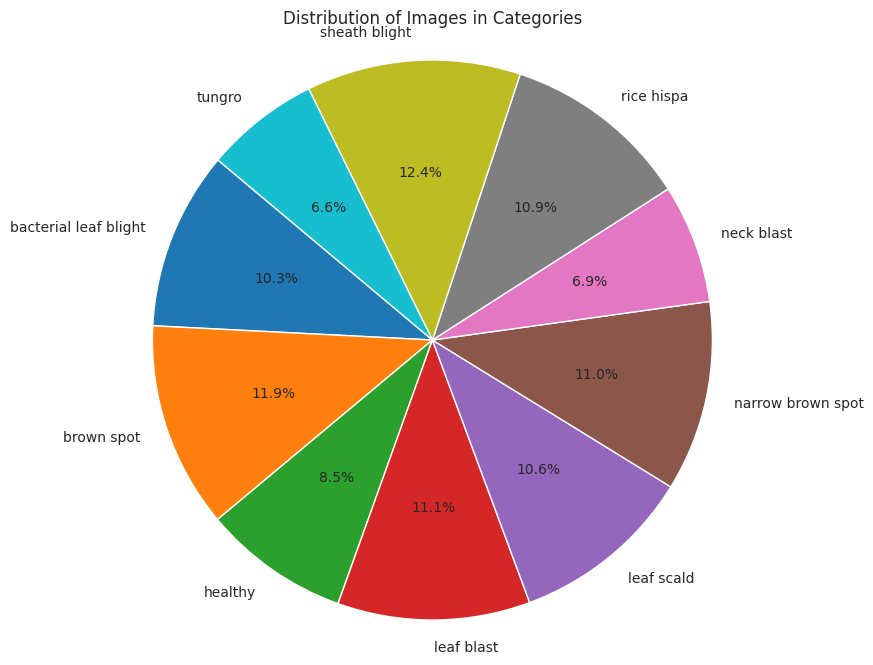

In [8]:
print(f'The No of Sub-directories {len(os.listdir(train))} ')
print()

images = 0
categories = []
percentages = []

for dir in os.listdir(train):
    subdir_path = os.path.join(train, dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        category_name = dir.replace('_', ' ')  # Optional: Replace underscores with spaces for better display
        categories.append(category_name)
        percentages.append((num_files / 11790) * 100)
        print(f'The No of Images percentage inside the Sub-directory {dir}: {(num_files / images_train) * 100 }')
        images += num_files 

print()
print(f'Total No of Images {images}')

# Plotting the data
plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Images in Categories')
print()
plt.show()

# Model Creation

In [9]:
print()
images_train = 0
for dir in os.listdir(train):
    subdir_path = os.path.join(train, dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The number of Images inside the Sub-directory {dir}: {num_files}')
        images_train += num_files 
print()
print(f'Total No of Images {images_train}')


The number of Images inside the Sub-directory bacterial_leaf_blight: 390
The number of Images inside the Sub-directory brown_spot: 450
The number of Images inside the Sub-directory healthy: 320
The number of Images inside the Sub-directory leaf_blast: 421
The number of Images inside the Sub-directory leaf_scald: 400
The number of Images inside the Sub-directory narrow_brown_spot: 416
The number of Images inside the Sub-directory neck_blast: 260
The number of Images inside the Sub-directory rice_hispa: 411
The number of Images inside the Sub-directory sheath_blight: 468
The number of Images inside the Sub-directory tungro: 250

Total No of Images 3786


In [10]:
print()
images_test = 0
for dir in os.listdir(test):
    subdir_path = os.path.join(test, dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The number of Images inside the Sub-directory {dir}: {num_files}')
        images_test += num_files 
print()
print(f'Total No of Images {images_test}')


The number of Images inside the Sub-directory bacterial_leaf_blight: 140
The number of Images inside the Sub-directory brown_spot: 120
The number of Images inside the Sub-directory healthy: 120
The number of Images inside the Sub-directory leaf_blast: 362
The number of Images inside the Sub-directory leaf_scald: 146
The number of Images inside the Sub-directory narrow_brown_spot: 142
The number of Images inside the Sub-directory Neck_Blast: 122
The number of Images inside the Sub-directory Rice Hispa: 80
The number of Images inside the Sub-directory Sheath Blight: 88
The number of Images inside the Sub-directory Tungro: 100

Total No of Images 1420


In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

# Model Creation 1.0

In [12]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,
#       rotation_range=30,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       vertical_flip=True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
train_ds = train_datagen.flow_from_directory(train, 
    class_mode='categorical',
    batch_size = 32, 
    target_size = (256, 256))

test_ds = test_datagen.flow_from_directory(test, 
    class_mode='categorical',
    batch_size = 32, 
    target_size = (256, 256))


Found 3786 images belonging to 10 classes.
Found 1420 images belonging to 10 classes.


In [14]:
from keras.applications import DenseNet121

In [17]:
conv_l = DenseNet121(weights = 'imagenet',
             include_top = False,
             input_shape = (256,256,3))

In [18]:
conv_l.trainable = False

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization

In [20]:
model = Sequential()
model.add(conv_l)
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [22]:
import scipy as sp

import tensorflow_addons as tfa
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define batch size and total number of training and testing samples
# batch_size = 32
# total_train_samples = images_train_aug # 11790 images
# total_test_samples = images_test # 2361 images

# Define the initial learning rate
# initial_lr = le-3

# Define the learning rate scheduler (Cyclical Learning Rate)


# Compile the model with the Adam optimizer and Cyclical Learning Rate
opt = Adam(learning_rate = 1e-3)
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with the learning rate scheduler and early stopping
history = model.fit(
    train_ds,
    epochs=1, ##50
    validation_data=test_ds,
    # steps_per_epoch=total_train_samples // batch_size,  
    # validation_steps=total_test_samples // batch_size,  
    # callbacks=[early_stopping]
)


119/119 [==============================] - 333s 3s/step - loss: 1.7735 - accuracy: 0.7499 - val_loss: 20.9404 - val_accuracy: 0.0183


Text(0.5, 1.0, 'Accuracy vs Validation accuracy')

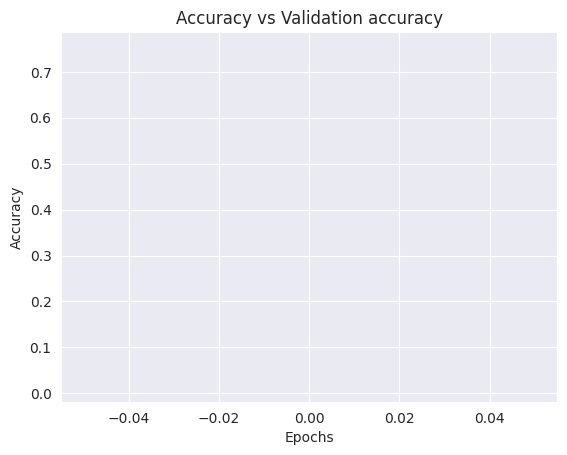

In [23]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Validation accuracy")

Text(0.5, 1.0, 'Loss vs Validation Loss')

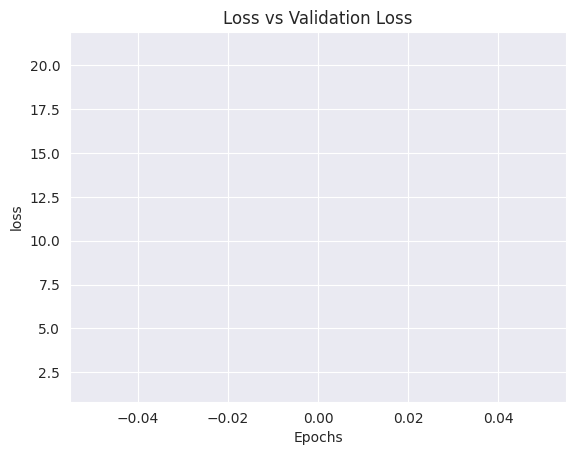

In [24]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Loss vs Validation Loss")

45/45 [==============================] - 87s 2s/step


<Figure size 800x600 with 0 Axes>

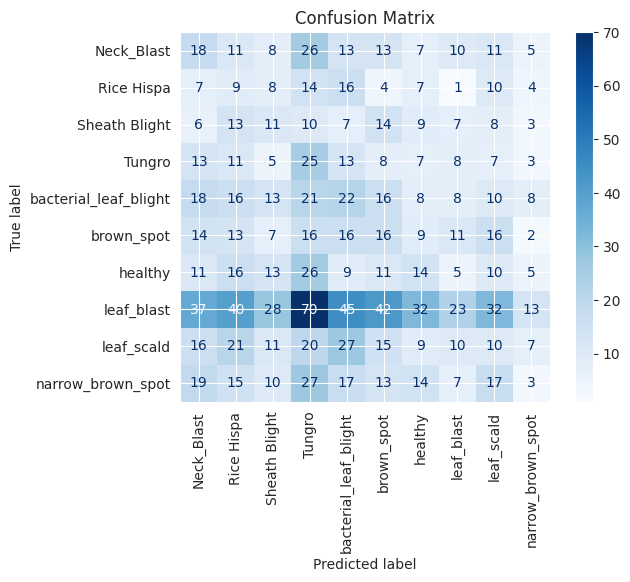

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels from the 'test_ds' directory iterator
true_labels = test_ds.labels

# Assuming 'model' is already trained
pred_probs = model.predict(test_ds)
pred_labels = np.argmax(pred_probs, axis=1)
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Display the confusion matrix
class_labels = list(test_ds.class_indices.keys())  # Get class labels from the generator
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.title('Confusion Matrix')
plt.show()

119/119 [==============================] - 236s 2s/step


<Figure size 800x600 with 0 Axes>

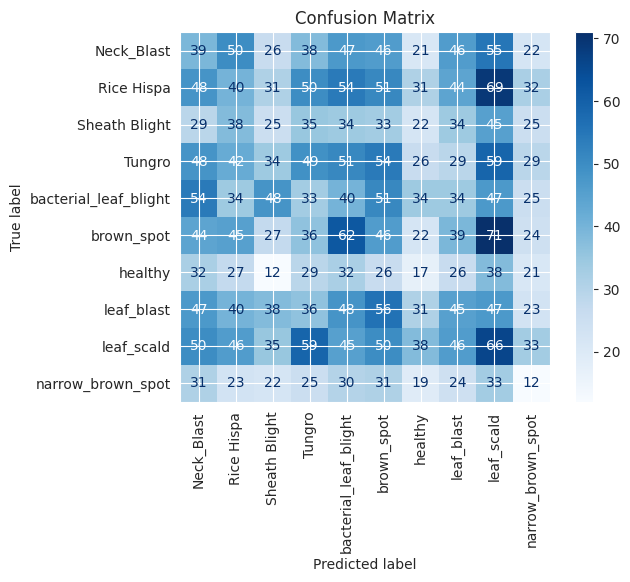

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels from the 'test_ds' directory iterator
true_labels = train_ds.labels

# Assuming 'model' is already trained
pred_probs = model.predict(train_ds)
pred_labels = np.argmax(pred_probs, axis=1)
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Display the confusion matrix
class_labels = list(test_ds.class_indices.keys())  # Get class labels from the generator
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.title('Confusion Matrix')
plt.show()

# Model Creation 2.0

In [30]:
train_datagen = ImageDataGenerator(
#     rotation_range=20,
    rescale = 1./255,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     vertical_flip=True,
#     brightness_range=[0.8, 1.2],
#     channel_shift_range=0.1,
#     fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [31]:
train_ds = train_datagen.flow_from_directory(train, 
    class_mode='categorical',
    batch_size = 32, 
    target_size = (256, 256),shuffle = False)

test_ds = test_datagen.flow_from_directory(test, 
    class_mode='categorical',
    batch_size = 32, 
    target_size = (256, 256),shuffle = False)

Found 15023 images belonging to 10 classes.
Found 3422 images belonging to 10 classes.


In [32]:
from keras.applications import EfficientNetB1

In [33]:
from keras.layers import Dropout
base_model = EfficientNetB1(weights = 'imagenet',
             include_top = False,
             input_shape = (256,256,3))
# last_block = base_model.get_layer('block7a_expand_conv')
# conv_l.trainable = False
# model = Sequential()
# model.add(conv_l)
# model.add(BatchNormalization())
# model.add(Flatten())
# model.add(Dense(256,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10,activation='softmax'))

27018416/27018416 [==============================] - 13s 0us/step


In [44]:
# last_block_index = base_model.layers.index(base_model.get_layer('block7a_expand_conv'))

In [34]:
for layer in base_model.layers:
    layer.trainable = False

In [36]:
from tensorflow.keras import layers, models

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # num_classes is the number of classes in your dataset
])

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional  (None, 8, 8, 1280)        6575239   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 128)               163968    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 6740497 (25.71 MB)
Trainable params: 165

In [39]:
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Example of using ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_lr=1e-5, cooldown=0)


# Define batch size and total number of training and testing samples
# batch_size = 32
# total_train_samples = images_train_aug # 11790 images
# total_test_samples = images_test # 2361 images

# Define the initial learning rate
# initial_lr = le-3

# Define the learning rate scheduler (Cyclical Learning Rate)


# Compile the model with the Adam optimizer and Cyclical Learning Rate
opt = Adam(1e-5)
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with the learning rate scheduler and early stopping
history = model.fit(
    train_ds,
    epochs=5, ##50
    validation_data=test_ds,
#     steps_per_epoch=total_train_samples // batch_size,  
#     validation_steps=total_test_samples // batch_size,  
    callbacks=[reduce_lr]
)


Epoch 1/5
470/470 [==============================] - 815s 2s/step - loss: 2.3198 - accuracy: 0.1049 - val_loss: 2.3156 - val_accuracy: 0.1116 - lr: 1.0000e-05
Epoch 2/5
470/470 [==============================] - 814s 2s/step - loss: 2.3094 - accuracy: 0.1048 - val_loss: 2.3138 - val_accuracy: 0.1116 - lr: 1.0000e-05
Epoch 3/5
470/470 [==============================] - 779s 2s/step - loss: 2.3065 - accuracy: 0.1058 - val_loss: 2.3161 - val_accuracy: 0.1598 - lr: 1.0000e-05
Epoch 4/5
470/470 [==============================] - 773s 2s/step - loss: 2.3070 - accuracy: 0.1088 - val_loss: 2.3154 - val_accuracy: 0.0906 - lr: 1.0000e-05
Epoch 5/5
470/470 [==============================] - 772s 2s/step - loss: 2.3036 - accuracy: 0.1071 - val_loss: 2.3180 - val_accuracy: 0.0906 - lr: 1.0000e-05


### Index of misclassifed images

In [40]:
misclassified_indices = np.where(true_labels != pred_labels)[0]


In [41]:
# Get the confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Display the confusion matrix
class_labels = list(train_ds.class_indices.keys())
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)

# plt.figure(figsize=(8, 6))
# disp.plot(cmap=plt.cm.Blues)
# plt.xticks(rotation=90)
# plt.title('Confusion Matrix')
# plt.show()

# Find misclassified indices
misclassified_indices = np.where(true_labels != pred_labels)[0]

# Group misclassified indices by true class
misclassified_by_class = {}
for true_class in range(len(class_labels)):
    class_indices = np.where(true_labels[misclassified_indices] == true_class)[0]
    misclassified_by_class[class_labels[true_class]] = class_indices

# Assuming you have a function to display images (display_images(images))
# def display_images(images):
#     plt.figure(figsize=(10, 10))
#     for i, image_idx in enumerate(images):
#         plt.subplot(5, 5, i+1)
#         plt.xticks([])
#         plt.yticks([])
#         plt.grid(False)
#         plt.imshow(train_ds[misclassified_indices[image_idx]][0])  # Assuming train_ds is an ImageDataGenerator
#         plt.xlabel(f'Predicted: {class_labels[pred_labels[misclassified_indices[image_idx]]]}')
#     plt.show()

# # Display misclassified images class by class
# for true_class, misclassified_indices in misclassified_by_class.items():
#     print(f'Misclassified Images for Class {true_class}:')
#     display_images(misclassified_indices[:25])  # Display up to 25 misclassified images per class


In [42]:
misclassified_indices

array([    0,     1,     2, ..., 15020, 15021, 15022])

In [1]:
len(misclassified_by_class['bacterial_leaf_blight'])

NameError: name 'misclassified_by_class' is not defined

##### If you look at the confusion matrix it won't add up to 99% i think model is overfitting. Let's try different approach

# Model Creation 3.0

In [44]:
input_folder = train_augs
train_dir = '/kaggle/working/train'
test_dir = '/kaggle/working/test'
val_dir = '/kaggle/working/val'

NameError: name 'train_aug' is not defined

In [45]:
splitfolders.ratio(input_folder, output=train_dir, seed=42, ratio=(0.7, 0.20, 0.10))


NameError: name 'input_folder' is not defined

In [46]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [47]:
train_ds = train_datagen.flow_from_directory(train_dir + '/train', 
    class_mode='categorical',
    batch_size = 32, 
    target_size = (256, 256),
                                            )

test_ds = test_datagen.flow_from_directory(train_dir + '/test', 
    class_mode='categorical',
    batch_size = 32, 
    target_size = (256, 256),shuffle=False)

val_ds = val_datagen.flow_from_directory(train_dir + '/val', 
    class_mode='categorical',
    batch_size = 32, 
    target_size = (256, 256),
    shuffle = False
                                        )

NameError: name 'train_dir' is not defined

In [48]:
from keras.applications import DenseNet121

In [49]:
conv_l = DenseNet121(weights = 'imagenet',
             include_top = False,
             input_shape = (256,256,3))

In [50]:
conv_l.trainable = False

In [51]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization

In [52]:
model = Sequential()

In [53]:
model.add(conv_l)
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(9,activation='softmax'))

In [54]:
images_train = 0
for dir in os.listdir(train_dir  + '/train'):
    subdir_path = os.path.join(train_dir + '/train', dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The No of Images inside the Sub-directory {dir}: {num_files}')
        images_train += num_files 
        
print()
print(images_train)

NameError: name 'train_dir' is not defined

In [55]:
images_test = 0
for dir in os.listdir(train_dir  + '/test'):
    subdir_path = os.path.join(train_dir  + '/test', dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The No of Images inside the Sub-directory {dir}: {num_files}')
        images_test += num_files 
print()
print(images_test)

NameError: name 'train_dir' is not defined

In [56]:
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define batch size and total number of training and testing samples
batch_size = 32
# total_train_samples = images_train # 11790 images
# total_test_samples = images_test # 2361 images

# Define the initial learning rate
initial_lr = 0.001

# Define the learning rate scheduler (Cyclical Learning Rate)
# clr = tfa.optimizers.CyclicalLearningRate(
#     initial_learning_rate=initial_lr,
#     maximal_learning_rate= 10 * initial_lr,
#     step_size= 2 * total_train_samples // batch_size,  # Total cycles = 2
#     scale_mode="cycle",
#     scale_fn=lambda x: 1 / (2.0 ** (x - 1))
# )

# Compile the model with the Adam optimizer and Cyclical Learning Rate
opt = Adam()
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with the learning rate scheduler and early stopping
history = model.fit(
    train_ds,
    epochs=50,
    validation_data=test_ds,
#     steps_per_epoch=total_train_samples // batch_size,  
#     validation_steps=total_test_samples // batch_size,  
#     callbacks=[early_stopping]
)

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 542, in dispatch_queue
      await self.process_one()
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 531, in process_one
      await dispatch(*args)
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 775, in execute_request
      reply_content = await reply_content
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_343210/1046129278.py", line 30, in <module>
      history = model.fit(
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/keras/src/engine/training.py", line 1081, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/keras/src/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/keras/src/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/keras/src/backend.py", line 5566, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[32,9] labels_size=[32,10]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_130444]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels from the 'test_ds' directory iterator
true_labels = test_ds.labels

# Assuming 'model' is already trained
pred_probs = model.predict(test_ds)
pred_labels = np.argmax(pred_probs, axis=1)
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Display the confusion matrix
class_labels = list(test_ds.class_indices.keys())  # Get class labels from the generator
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.title('Confusion Matrix')
plt.show()

In [57]:
# true_labels1 = val_ds.labels

# # Assuming 'model' is already trained
# pred_probs1 = model.predict(val_ds)
# pred_labels1 = np.argmax(pred_probs1, axis=1)
# conf_matrix1 = confusion_matrix(true_labels1, pred_labels1)

# # Display the confusion matrix
# class_labels1 = list(val_ds.class_indices.keys())  # Get class labels from the generator
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1, display_labels=class_labels1)

# # Plot the confusion matrix
# plt.figure(figsize=(8, 6))
# disp.plot(cmap=plt.cm.Blues)

# # Rotate x-axis labels by 90 degrees
# plt.xticks(rotation=90)

# plt.title('Confusion Matrix')
# plt.show()

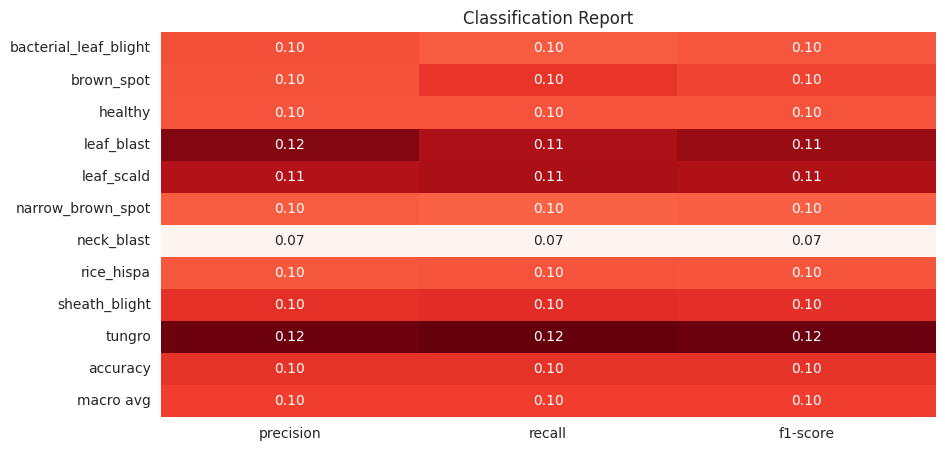

In [58]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true_labels1 and pred_labels1 from your CNN model

# Generate a classification report
report = classification_report(true_labels, pred_labels, target_names=class_labels, output_dict=True)

# Convert the report to a DataFrame for better visualization
import pandas as pd
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap=plt.cm.Reds,fmt=".2f", cbar=False)
plt.title('Classification Report')
plt.show()


In [59]:
model.save('my_model.h5')

/media/sumon/Caleakshon Data/Program/Python/RiceLeafDiseaseDetectionCNN/pythonProject1/.venv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
